In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1500-games-on-steam-by-revenue-09-09-2024/Steam_2024_bestRevenue_1500.csv


In [2]:
df = pd.read_csv("/kaggle/input/top-1500-games-on-steam-by-revenue-09-09-2024/Steam_2024_bestRevenue_1500.csv")
df.head()

,name,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
0,WWE 2K24,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,2315690
1,EARTH DEFENSE FORCE 6,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,2291060
2,Sins of a Solar Empire II,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",1575940
3,Legend of Mortal,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,1859910
4,Shin Megami Tensei V: Vengeance,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,1875830


In [3]:
# Let's find the number of null values
df.isna().sum().sum()

3

##### Since the number of rows with empty values is very small, we can simply exclude them from our analysis

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1497 non-null   object 
 1   releaseDate     1497 non-null   object 
 2   copiesSold      1497 non-null   int64  
 3   price           1497 non-null   float64
 4   revenue         1497 non-null   float64
 5   avgPlaytime     1497 non-null   float64
 6   reviewScore     1497 non-null   int64  
 7   publisherClass  1497 non-null   object 
 8   publishers      1497 non-null   object 
 9   developers      1497 non-null   object 
 10  steamId         1497 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 140.3+ KB


# Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

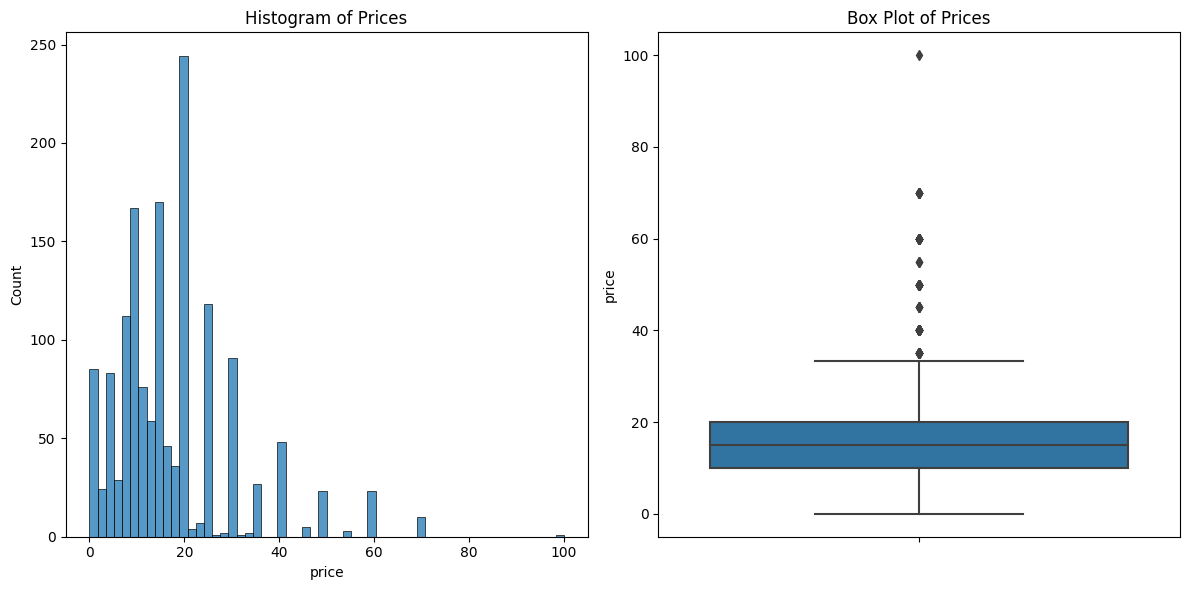

In [6]:
# sns.displot(data=df, x=df['price'], stat='count', bins='auto')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
sns.histplot(data=df, x='price', stat='count', bins='auto', ax=axes[0])
axes[0].set_title('Histogram of Prices')

# Box Plot
sns.boxplot(data=df, y='price', ax=axes[1])
axes[1].set_title('Box Plot of Prices')

plt.tight_layout()
plt.show()

**We see that the average price of a game is close to 20 dollars**

<Figure size 2400x1200 with 0 Axes>

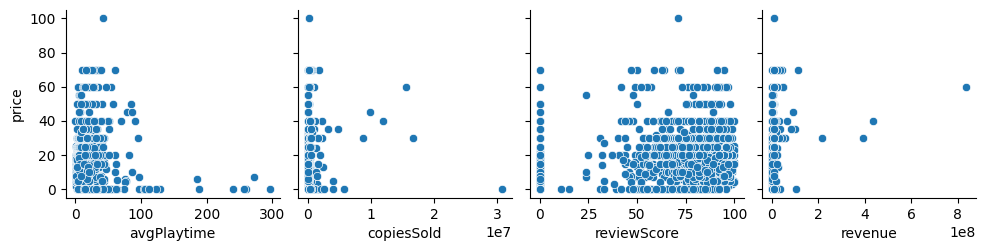

In [7]:
plt.figure(figsize=(24,12))
sns.pairplot(data=df,
                  x_vars=['avgPlaytime', 'copiesSold','reviewScore', 'revenue'],
                  y_vars=['price'],
                  kind="scatter")
plt.show()

**We observe that there is no correlation between any of avgPlaytime, reviewScore, copiesSold, revenue, and price**

In [8]:
df['publishers'].value_counts()

publishers
Kagura Games                     17
Electronic Arts                  16
072 Project                      14
Ubisoft                          13
Mango Party,Mango Party News     11
                                 ..
BLAMCAM Interactive               1
Soda Game Studio                  1
Frogstorm                         1
Significant Steak                 1
Red Nexus Games Inc.,IndieArk     1
Name: count, Length: 1131, dtype: int64

In [9]:
df['publisherClass'].value_counts()


publisherClass
Indie    1299
AA        146
AAA        52
Name: count, dtype: int64

In [10]:
df['developers'].value_counts()


developers
Lust Desires 🖤          9
EA Los Angeles          7
MAGES. Inc.             7
Square Enix             6
CAPCOM Co., Ltd.        5
                       ..
Deathyell Games         1
Fuse Game               1
Demagog Studio          1
Skaule                  1
Red Nexus Games Inc.    1
Name: count, Length: 1405, dtype: int64

# Feature Engineering

In [11]:
# We can remove the steamID and the name as they won't be useful in our analysis

df.drop(columns = ['name','steamId'], inplace=True)
df



,releaseDate,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers
0,07-03-2024,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts
1,25-07-2024,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT
2,15-08-2024,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment"
3,14-06-2024,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.
4,13-06-2024,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS
...,...,...,...,...,...,...,...,...,...
1495,11-04-2024,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games
1496,07-06-2024,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE
1497,20-05-2024,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion
1498,28-08-2024,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd"


In [12]:
# Before removing the releaseDate column, we may need to find the number of days that have passed since the game was released because the older the game is the lower its' price becomes
df['releaseDate'] = pd.to_datetime(df['releaseDate'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   releaseDate     1497 non-null   datetime64[ns]
 1   copiesSold      1497 non-null   int64         
 2   price           1497 non-null   float64       
 3   revenue         1497 non-null   float64       
 4   avgPlaytime     1497 non-null   float64       
 5   reviewScore     1497 non-null   int64         
 6   publisherClass  1497 non-null   object        
 7   publishers      1497 non-null   object        
 8   developers      1497 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 117.0+ KB


In [13]:
# Now, we can add a column that shows how many days have passed since the game's release date
from datetime import datetime

df['days_since_release'] = (datetime.now() - df['releaseDate']).dt.days
df.drop(columns= ['releaseDate'], inplace=True)
df

,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,days_since_release
0,165301,99.99,8055097.0,42.365140,71,AAA,2K,Visual Concepts,201
1,159806,59.99,7882151.0,29.651061,57,Indie,D3PUBLISHER,SANDLOT,61
2,214192,49.99,7815247.0,12.452593,88,Indie,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment",40
3,440998,19.99,7756399.0,24.797817,76,Indie,"Paras Games,Obb Studio Inc.",Obb Studio Inc.,102
4,141306,59.99,7629252.0,34.258496,96,AA,SEGA,ATLUS,103
...,...,...,...,...,...,...,...,...,...
1495,452146,24.99,8739530.0,14.494432,73,Indie,Games Operators,Jutsu Games,166
1496,2640903,0.00,8706135.0,31.974027,74,Indie,IRONMACE,IRONMACE,109
1497,501474,34.99,8641459.0,11.891152,88,AA,Coffee Stain Publishing,Lavapotion,127
1498,156339,59.99,8440898.0,14.733899,81,AA,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd",27


In [14]:
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)
df_encoded

,copiesSold,price,revenue,avgPlaytime,reviewScore,days_since_release,publisherClass_AA,publisherClass_AAA,publisherClass_Indie,publishers_0 Deer Soft Partnership,...,developers_瞬息万变工作室,developers_筠悦游戏,developers_糯米团子工作室,developers_老乌贼工作室,developers_致意,developers_蒸汽满满工作室,"developers_雪山雞白郎,SnowGBL",developers_零创游戏(ZerocreationGame),developers_雷鸣工作室,developers_香港商河洛互動娛樂股份有限公司
0,165301.0,99.99,8055097.0,42.365140,71.0,201.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,159806.0,59.99,7882151.0,29.651061,57.0,61.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,214192.0,49.99,7815247.0,12.452593,88.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,440998.0,19.99,7756399.0,24.797817,76.0,102.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,141306.0,59.99,7629252.0,34.258496,96.0,103.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,156339.0,59.99,8440898.0,14.733899,81.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1499,544144.0,19.99,8125042.0,30.160995,82.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
710,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
